In [2]:
import xml.etree.ElementTree as ET
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = {}
markers = ['RASIS', 'LASIS', 'RPSIS', 'LPSIS', 'RTH1', 'RTH2', 'RTH3', 'RTH4', 'RFLE', 'RFAL', 'RSK1', 'RSK2', 'RSK4', 'RSK3', 'RFCC', 'RFMT1', 'RFMT2', 'RFMT5', 'LTH1', 'LTH2', 'LTH3', 'LTH4', 'LFLE', 'LSK1', 'LSK2', 'LSK4', 'LSK3', 'LFAL', 'LFCC', 'LFMT1', 'LFMT2', 'LFMT5']

In [3]:

def extract_ik_weights(ik, markers = markers):

    info = {}
    # Print the full structure
    for file in ik:
        a=0
        b=0
        weight = {}
        tree = ET.parse(file)
        root = tree.getroot()
        while root[0][b].tag != 'IKTaskSet':
            b+=1
        while True:                
            try:
                if (root[0][b][0][a].attrib)["name"] in markers:
                    weight[(root[0][b][0][a].attrib)["name"]] = {root[0][b][0][a][1].tag:root[0][b][0][a][1].text,
                                                                        root[0][b][0][a][0].tag:root[0][b][0][a][0].text}
                a+=1
            except IndexError:
                break
            
        info[Path(file).name] = weight
    return info

In [12]:

def plot_ik_weights_heatmap(info,subject):
    # 1. Transform your dictionary into a long-form DataFrame
    rows = []
    for trial, markers in info.items():
        trial_id = trial.replace('.xml', '').replace('ik_setup_', '')
        for marker, details in markers.items():
            rows.append({
                'Trial': trial_id,
                'Marker': marker,
                'Weight': float(details['weight'])
            })

    df = pd.DataFrame(rows)

    # 2. Pivot for the Heatmap
    pivot_df = df.pivot(index='Marker', columns='Trial', values='Weight')
    # pivot_df = pivot_df[['STW1', 'STW2', 'STW3', 'STW4', 'STW5']] # Ensure order

    # 3. Plotting the Heatmap
    plt.figure(figsize=(10, 12))
    sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Weight'})
    plt.title('Distribution of Marker Weights across IK Trials')
    plt.savefig(f'marker_weights_heatmaps{subject}.png')

    # 4. Plotting a Comparison for Key Markers
    # key_markers = ['RASIS', 'RPSIS', 'RTH1', 'RFLE', 'RFCC']
    # subset_df = df[df['Marker'].isin(key_markers)]

    # plt.figure(figsize=(10, 6))
    # sns.barplot(data=subset_df, x='Marker', y='Weight', hue='Trial')
    # plt.title('Comparison of Specific Marker Weights')
    # plt.ylabel('Weight Value')
    # plt.savefig('key_markers_weights_bar_s02.png')

In [30]:

def plot_ik_weights_comparison(data):
    # Assuming 'data' contains subjects as top-level keys
    # Example format: {'Subject_01': {...}, 'Subject_02': {...}}

    rows = []
    for subject, setups in data.items():
        for setup_name, markers in setups.items():
            for marker, details in markers.items():
                rows.append({
                    'Subject': subject,
                    'Marker': marker,
                    'Weight': float(details['weight'])
                })

    df_comp = pd.DataFrame(rows)

    # Create a Box Plot to see the variance per marker across all subjects
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_comp, x='Marker', y='Weight', palette='Set3')
    sns.stripplot(data=df_comp, x='Marker', y='Weight', color='black', alpha=0.3) # Show individual points
    plt.xticks(rotation=45)
    plt.title('Comparison of Marker Weights Across All Subjects')
    plt.ylabel('Weight Value')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig('marker_weights_comparison_all_subjects.png')
    plt.show()

In [27]:

for subject in range(2,11):
    ik = [rf"d:\UG_Proj\Human Sitting to Walking Transitions\S{subject:02d}\IK\ik_setup_stw{trial}.xml" for trial in range(1,6)]
    info = extract_ik_weights(ik)
    # plot_ik_weights_heatmap(info,subject)
    data[f'Subject_{subject:02d}'] = info
    
    

In [28]:
data.keys()

dict_keys(['Subject_01', 'Subject_02', 'Subject_03', 'Subject_04', 'Subject_05', 'Subject_06', 'Subject_07', 'Subject_08', 'Subject_09', 'Subject_10'])

C:\Users\gupta\AppData\Local\Temp\ipykernel_11500\3843230269.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x='Marker', y='Weight', palette='Set3')


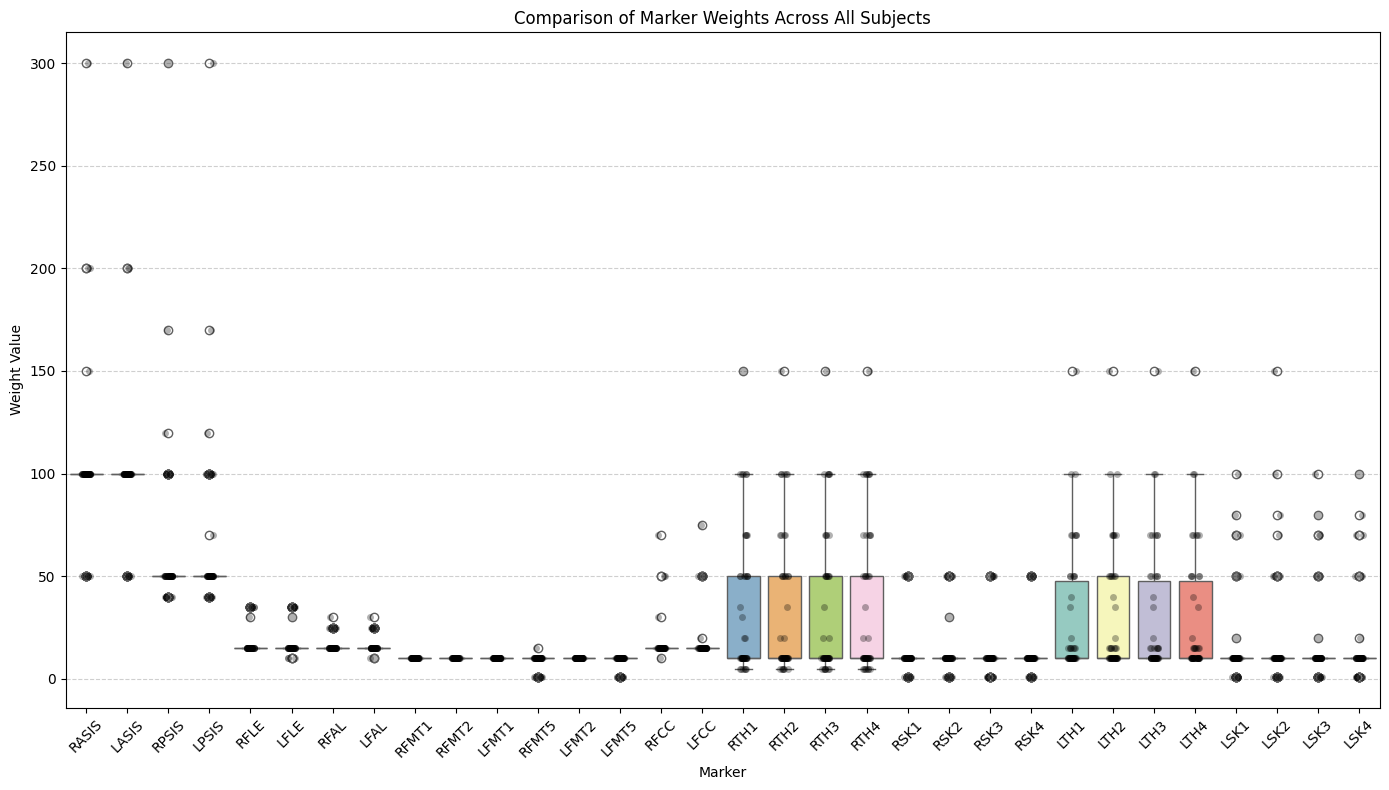

In [31]:
plot_ik_weights_comparison(data)

In [33]:
data["Subject_07"]["ik_setup_stw1.xml"]

{'RASIS': {'weight': '100', 'apply': 'true'},
 'LASIS': {'weight': '100', 'apply': 'true'},
 'RPSIS': {'weight': '50', 'apply': 'true'},
 'LPSIS': {'weight': '50', 'apply': 'true'},
 'RTH1': {'weight': '10', 'apply': 'true'},
 'RTH2': {'weight': '10', 'apply': 'true'},
 'RTH3': {'weight': '10', 'apply': 'true'},
 'RTH4': {'weight': '10', 'apply': 'true'},
 'RFLE': {'weight': '15', 'apply': 'true'},
 'RFAL': {'weight': '15', 'apply': 'true'},
 'RSK1': {'weight': '10', 'apply': 'true'},
 'RSK2': {'weight': '10', 'apply': 'true'},
 'RSK4': {'weight': '10', 'apply': 'true'},
 'RSK3': {'weight': '10', 'apply': 'true'},
 'RFCC': {'weight': '15', 'apply': 'true'},
 'RFMT1': {'weight': '10', 'apply': 'true'},
 'RFMT2': {'weight': '10', 'apply': 'true'},
 'RFMT5': {'weight': '10', 'apply': 'true'},
 'LTH1': {'weight': '10', 'apply': 'true'},
 'LTH2': {'weight': '10', 'apply': 'true'},
 'LTH3': {'weight': '10', 'apply': 'true'},
 'LTH4': {'weight': '10', 'apply': 'true'},
 'LFLE': {'weight': '15